# Modeling Global Population Growth with Linear and Polynomial Regression in Python

In [ ]:
pip install --upgrade pip setuptools packaging wheel

In [ ]:
pip install ISLP

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS, summarize, poly
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.anova import anova_lm

## Using the dataset for "World Population" from the "Projects" part, provided in the book "Lecture notes in Statistical modeling"

In [4]:
import requests
from io import StringIO

url = "https://ourworldindata.org/grapher/world-population-since-10000-bce-ourworldindata-series.csv"
headers = {'User-Agent': 'Mozilla/5.0'}
r = requests.get(url, headers=headers)
r.raise_for_status()

df = pd.read_csv(StringIO(r.text))
world = df[df['Entity']=='World'].copy()
world = world[world['Year'] >= 1950].reset_index(drop=True)
world = world.rename(columns={'Population (historical)': 'Pop'})

In [5]:
world

,Entity,Code,Year,Pop
0,World,OWID_WRL,1950,2493092801
1,World,OWID_WRL,1951,2536926981
2,World,OWID_WRL,1952,2584086282
3,World,OWID_WRL,1953,2634106196
4,World,OWID_WRL,1954,2685894824
...,...,...,...,...
69,World,OWID_WRL,2019,7811293646
70,World,OWID_WRL,2020,7887001253
71,World,OWID_WRL,2021,7954448327
72,World,OWID_WRL,2022,8021407128


In [8]:
world[['Year']]

,Year
0,1950
1,1951
2,1952
3,1953
4,1954
...,...
69,2019
70,2020
71,2021
72,2022


In [10]:
y = world['Pop']
X_lin = sm.add_constant(world[['Year']])

In [12]:
X_lin

,const,Year
0,1.0,1950
1,1.0,1951
2,1.0,1952
3,1.0,1953
4,1.0,1954
...,...,...
69,1.0,2019
70,1.0,2020
71,1.0,2021
72,1.0,2022


In [16]:
model_lin = sm.OLS(y, X_lin).fit()
model_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pop   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.85e-90
Time:                        16:28:34   Log-Likelihood:                -1469.3
No. Observations:                  74   AIC:                             2943.
Df Residuals:                      72   BIC:                             2947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.537e+11   1.11e+09   -138.005      0.000   -1.56e+11   -1.52e+11
Year        7.996e+07   5.61e+05    142.595      0.000    7.88e+07    8.11e+07
==============================================================================
Omnibus:                        8.593   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.339
Skew:                           0.804   Prob(JB):                       0.0155
Kurtosis:                       3.348   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

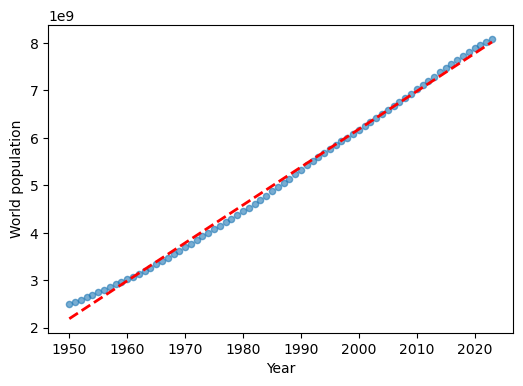

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(world['Year'], world['Pop'], s=20, alpha=0.6)
yrs = np.array([world['Year'].min(), world['Year'].max()])
preds = model_lin.params['const'] + model_lin.params['Year'] * yrs
ax.plot(yrs, preds, 'r--', lw=2)
ax.set_xlabel('Year')
ax.set_ylabel('World population')
plt.show()

In [20]:
poly = PolynomialFeatures(degree=2, include_bias=False)
Xp = poly.fit_transform(world[['Year']])
cols = poly.get_feature_names_out(['Year'])
Xp = pd.DataFrame(Xp, columns=cols)
Xp = sm.add_constant(Xp)

model_quad = sm.OLS(y, Xp).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pop   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.637e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          2.34e-111
Time:                        16:28:44   Log-Likelihood:                -1412.8
No. Observations:                  74   AIC:                             2832.
Df Residuals:                      71   BIC:                             2838.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.162e+11   5.43e+10     13.184      0.000    6.08e+11    8.24e+11
Year        -7.96e+08   5.47e+07    -14.553      0.000   -9.05e+08   -6.87e+08
Year^2      2.205e+05   1.38e+04     16.015      0.000    1.93e+05    2.48e+05
==============================================================================
Omnibus:                        1.181   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.013
Skew:                          -0.029   Prob(JB):                        0.602
Kurtosis:                       2.430   Cond. No.                     3.82e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

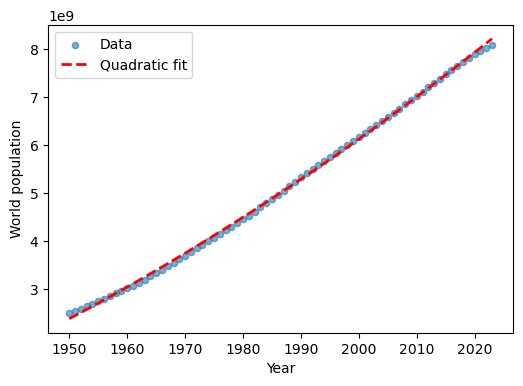

In [22]:
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(world['Year'], world['Pop'], s=20, alpha=0.6, label='Data')

year_grid = np.linspace(world['Year'].min(), world['Year'].max(), 200)

grid_df = pd.DataFrame({'Year': year_grid})
poly = PolynomialFeatures(degree=2, include_bias=False)
Xg = poly.fit_transform(grid_df[['Year']])
cols = poly.get_feature_names_out(['Year'])
Xg = pd.DataFrame(Xg, columns=cols)
Xg = sm.add_constant(Xg)

pop_pred = model_quad.predict(Xg)

ax.plot(year_grid, pop_pred, 'r--', lw=2, label='Quadratic fit')

ax.set_xlabel('Year')
ax.set_ylabel('World population')
ax.legend()
plt.show()

In [24]:
world['Year_c'] = world['Year'] - world['Year'].mean()

In [26]:
world['Year_c']

0    -36.5
1    -35.5
2    -34.5
3    -33.5
4    -32.5
      ... 
69    32.5
70    33.5
71    34.5
72    35.5
73    36.5
Name: Year_c, Length: 74, dtype: float64

In [28]:
y = world['Pop']
X_lin_c = sm.add_constant(world[['Year_c']])
model_lin_c = sm.OLS(y, X_lin_c).fit()
model_lin_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pop   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.85e-90
Time:                        16:28:55   Log-Likelihood:                -1469.3
No. Observations:                  74   AIC:                             2943.
Df Residuals:                      72   BIC:                             2947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.104e+09    1.2e+07    426.109      0.000    5.08e+09    5.13e+09
Year_c      7.996e+07   5.61e+05    142.595      0.000    7.88e+07    8.11e+07
==============================================================================
Omnibus:                        8.593   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.339
Skew:                           0.804   Prob(JB):                       0.0155
Kurtosis:                       3.348   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
poly_c = PolynomialFeatures(degree=2, include_bias=False)
X2_c = poly_c.fit_transform(world[['Year_c']])
cols2 = poly_c.get_feature_names_out(['Year_c'])
X2_c = pd.DataFrame(X2_c, columns=cols2)
X2_c = sm.add_constant(X2_c)

model_quad_c = sm.OLS(y, X2_c).fit()
model_quad_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pop   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.637e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          2.34e-111
Time:                        16:28:57   Log-Likelihood:                -1412.8
No. Observations:                  74   AIC:                             2832.
Df Residuals:                      71   BIC:                             2838.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.003e+09   8.43e+06    593.812      0.000    4.99e+09    5.02e+09
Year_c      7.996e+07   2.63e+05    304.113      0.000    7.94e+07    8.05e+07
Year_c^2    2.205e+05   1.38e+04     16.015      0.000    1.93e+05    2.48e+05
==============================================================================
Omnibus:                        1.181   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.013
Skew:                          -0.029   Prob(JB):                        0.602
Kurtosis:                       2.430   Cond. No.                         918.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
anova_lm(model_lin, model_quad)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,72.0,7.643746e+17,0.0,NaN,NaN,NaN
1,71.0,1.657184e+17,1.0,5.986562e+17,256.486782,2.860925e-25


In [34]:
X_full = Xp 
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.3, random_state=42
)
mdl = sm.OLS(y_train, sm.add_constant(X_train, has_constant='add')).fit()
y_pred = mdl.predict(sm.add_constant(X_test, has_constant='add'))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Test MSE:', mean_squared_error(y_test, y_pred))
print('Test RMSE:', rmse)

Test MSE: 2713232614238182.5
Test RMSE: 52088699.48691542


## Following the lab from the book (everything bellow)

In [36]:
def abline(ax, intercept, slope, *args, **kwargs):
    xlim = ax.get_xlim()
    y0, y1 = intercept + slope * xlim[0], intercept + slope * xlim[1]
    ax.plot(xlim, [y0, y1], *args, **kwargs)

In [40]:
new_years = pd.DataFrame({'Year':[2000, 2025, 2050]})
# for linear:
newX_lin = sm.add_constant(new_years)
pred_lin = model_lin.get_prediction(newX_lin)
print("Linear fit predictions:\n", pred_lin.predicted_mean)
print("  95% CI:\n", pred_lin.conf_int())
print("  95% PI:\n", pred_lin.conf_int(obs=True))

Linear fit predictions:
 [6.18323604e+09 8.18223853e+09 1.01812410e+10]
  95% CI:
 [[6.15498995e+09 6.21148213e+09]
 [8.13302202e+09 8.23145504e+09]
 [1.01063502e+10 1.02561318e+10]]
  95% PI:
 [[5.97590543e+09 6.39056665e+09]
 [7.97102678e+09 8.39345028e+09]
 [9.96261629e+09 1.03998657e+10]]


In [92]:
# The predictions:
# 6.18 billion in 2000, 8.18 billion in 2025, 10.18 billion in 2050.

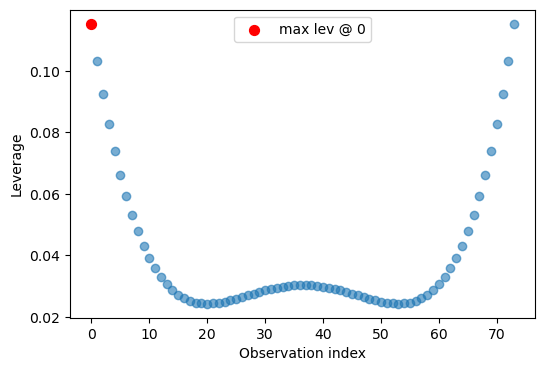

In [42]:
infl = model_quad.get_influence()
lev = infl.hat_matrix_diag

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(np.arange(len(lev)), lev, alpha=0.6)
ax.set_xlabel("Observation index")
ax.set_ylabel("Leverage")
# mark the max‐leverage
imax = np.argmax(lev)
ax.scatter(imax, lev[imax], color='red', s=50, label=f"max lev @ {imax}")
ax.legend()
plt.show()

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifs = [variance_inflation_factor(Xp.values, i)
        for i in range(1, Xp.shape[1])]
vif_df = pd.DataFrame({
    'feature': Xp.columns[1:],
    'VIF': vifs
})
print(vif_df)

  feature           VIF
0    Year  43270.542215
1  Year^2  43270.542215


In [44]:
X_drop = Xp.drop(columns=['Year^2'])
model_drop = sm.OLS(y, X_drop).fit()
model_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pop   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.85e-90
Time:                        16:30:40   Log-Likelihood:                -1469.3
No. Observations:                  74   AIC:                             2943.
Df Residuals:                      72   BIC:                             2947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.537e+11   1.11e+09   -138.005      0.000   -1.56e+11   -1.52e+11
Year        7.996e+07   5.61e+05    142.595      0.000    7.88e+07    8.11e+07
==============================================================================
Omnibus:                        8.593   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.339
Skew:                           0.804   Prob(JB):                       0.0155
Kurtosis:                       3.348   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
world['post2000'] = (world['Year'] >= 2000).astype(int)
world

,Entity,Code,Year,Pop,Year_c,post2000
0,World,OWID_WRL,1950,2493092801,-36.5,0
1,World,OWID_WRL,1951,2536926981,-35.5,0
2,World,OWID_WRL,1952,2584086282,-34.5,0
3,World,OWID_WRL,1953,2634106196,-33.5,0
4,World,OWID_WRL,1954,2685894824,-32.5,0
...,...,...,...,...,...,...
69,World,OWID_WRL,2019,7811293646,32.5,1
70,World,OWID_WRL,2020,7887001253,33.5,1
71,World,OWID_WRL,2021,7954448327,34.5,1
72,World,OWID_WRL,2022,8021407128,35.5,1


In [48]:
world['Year_post2000'] = world['Year'] * world['post2000']
world

,Entity,Code,Year,Pop,Year_c,post2000,Year_post2000
0,World,OWID_WRL,1950,2493092801,-36.5,0,0
1,World,OWID_WRL,1951,2536926981,-35.5,0,0
2,World,OWID_WRL,1952,2584086282,-34.5,0,0
3,World,OWID_WRL,1953,2634106196,-33.5,0,0
4,World,OWID_WRL,1954,2685894824,-32.5,0,0
...,...,...,...,...,...,...,...
69,World,OWID_WRL,2019,7811293646,32.5,1,2019
70,World,OWID_WRL,2020,7887001253,33.5,1,2020
71,World,OWID_WRL,2021,7954448327,34.5,1,2021
72,World,OWID_WRL,2022,8021407128,35.5,1,2022


In [50]:
world['post2000'] = (world['Year'] >= 2000).astype(int)
world['Year_post2000'] = world['Year'] * world['post2000']

X_int = sm.add_constant(world[['Year','post2000','Year_post2000']])
model_int = sm.OLS(y, X_int).fit()
model_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pop   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           8.91e-96
Time:                        16:32:05   Log-Likelihood:                -1444.9
No. Observations:                  74   AIC:                             2898.
Df Residuals:                      70   BIC:                             2907.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.442e+11   1.45e+09    -99.214      0.000   -1.47e+11   -1.41e+11
Year            7.51e+07   7.36e+05    102.052      0.000    7.36e+07    7.66e+07
post2000      -2.082e+10   4.69e+09     -4.445      0.000   -3.02e+10   -1.15e+10
Year_post2000  1.048e+07   2.33e+06      4.490      0.000    5.82e+06    1.51e+07
==============================================================================
Omnibus:                        6.320   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.241
Skew:                           0.711   Prob(JB):                       0.0441
Kurtosis:                       2.965   Cond. No.                     1.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# build X_cat and force numeric dtypes
dummies = pd.get_dummies(world['post2000'], prefix='post', drop_first=True)
X_cat = pd.concat([world[['Year']].astype(float), dummies.astype(float)], axis=1)
X_cat = sm.add_constant(X_cat)            # adds a float “const” column

y_num = world['Pop'].astype(float)

model_cat = sm.OLS(y_num, X_cat).fit()
model_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pop   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.509e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.51e-94
Time:                        16:32:11   Log-Likelihood:                -1454.2
No. Observations:                  74   AIC:                             2914.
Df Residuals:                      71   BIC:                             2921.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.462e+11   1.55e+09    -94.099      0.000   -1.49e+11   -1.43e+11
Year        7.615e+07   7.87e+05     96.753      0.000    7.46e+07    7.77e+07
post_1      2.147e+08   3.59e+07      5.978      0.000    1.43e+08    2.86e+08
==============================================================================
Omnibus:                        5.477   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                5.524
Skew:                           0.640   Prob(JB):                       0.0632
Kurtosis:                       2.607   Cond. No.                     3.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""